# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('previsao_de_renda.csv')

df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [11]:
df_numericos = df.select_dtypes(include=['float64','int64'])
df_numericos.head()

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,8682,1,36,3.575342,3.0,3369.24
1,1,12830,0,42,0.860274,2.0,6096.14
2,2,2885,2,31,8.065753,4.0,5658.98
3,3,16168,0,50,1.208219,2.0,7246.69
4,4,12438,0,52,13.873973,2.0,4017.37


In [13]:
df_numericos.corr()

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
Unnamed: 0,1.000000,-0.001868,0.015612,-0.004328,-0.002146,0.016628,0.007646
index,-0.001868,1.000000,0.039734,-0.047971,-0.034574,0.041818,-0.001740
qtd_filhos,0.015612,0.039734,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.004328,-0.047971,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.002146,-0.034574,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.016628,0.041818,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.007646,-0.001740,0.009567,0.042570,0.394235,0.020977,1.000000


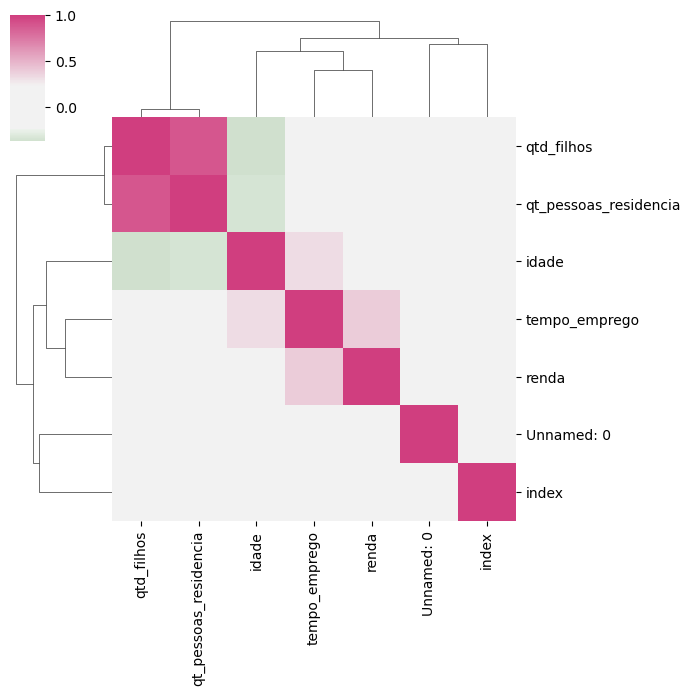

In [15]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap((df_numericos.corr()), figsize=(7,7), center=0, cmap=cmap)

Pode-se observar que existe uma correlacao forte entre a quantidade de filhos e a quantidade de pessoas por residencia. Uma relacao mais fraca se observa entre o tempo de emprego e a renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

As duas variaveis com melhor relacao com renda sao, respectivamente, tempo de emprego e idade.

,x,y
x,1.000000,0.394235
y,0.394235,1.000000


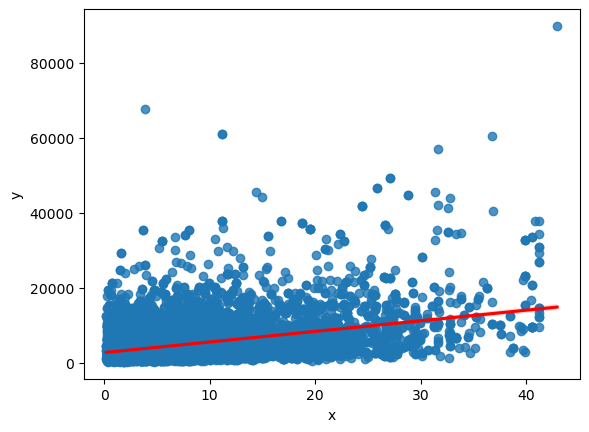

In [44]:
renda = df['renda']
tempo_emprego = df['tempo_emprego']
idade = df['idade']

renda_temprego = pd.DataFrame({'x':tempo_emprego,'y':renda})
_ = sns.regplot(x='x',y='y',data=renda_temprego,line_kws={'color':'red'})
renda_temprego.corr()

,x,y
x,1.00000,0.04257
y,0.04257,1.00000


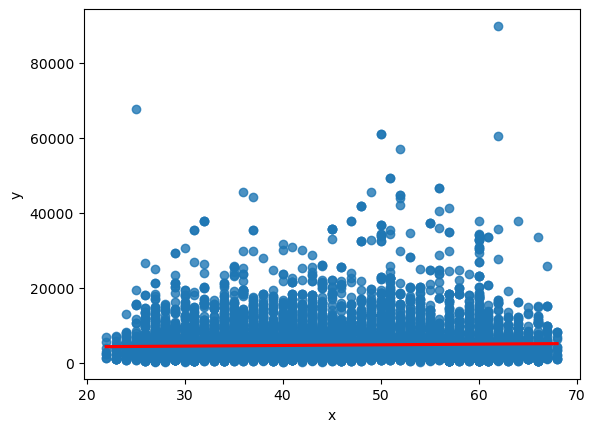

In [46]:
renda_idade = pd.DataFrame({'x':idade,'y':renda})
_ = sns.regplot(x='x',y='y',data=renda_idade,line_kws={'color':'red'})
renda_idade.corr()

3) Na su aopinião, há outliers na variável renda?

Para ambos os casos ha bastante outliers para a variavel renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [51]:
temprego_rank = pd.concat([renda_temprego,renda_temprego.rank()],axis=1)
temprego_rank.columns = ['x','y','x_rank','y_rank']
temprego_rank

,x,y,x_rank,y_rank
0,3.575342,3369.24,3694.5,7702.5
1,0.860274,6096.14,910.0,11716.5
2,8.065753,5658.98,7951.0,11265.0
3,1.208219,7246.69,1343.0,12603.0
4,13.873973,4017.37,10618.5,9033.5
...,...,...,...,...
14995,2.046575,1193.29,2250.0,1451.5
14996,12.079452,2519.18,10073.5,5514.5
14997,2.161644,1586.85,2325.5,2577.5
14998,3.295890,6975.39,3417.0,12427.5


,x,y,x_rank,y_rank
x,1.000000,0.394235,0.885458,0.352134
y,0.394235,1.000000,0.301799,0.754549
x_rank,0.885458,0.301799,1.000000,0.322303
y_rank,0.352134,0.754549,0.322303,1.000000


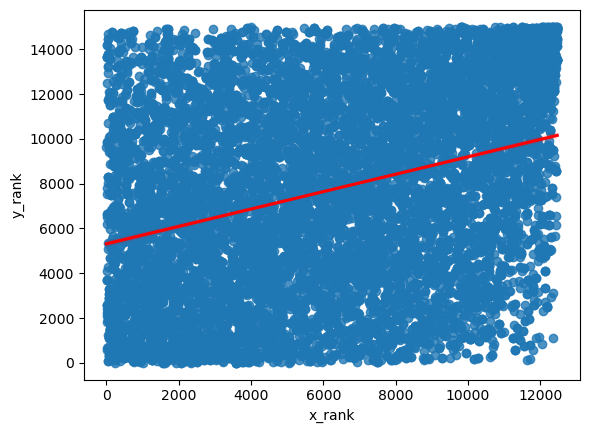

In [68]:
_ = sns.regplot(x='x_rank',y='y_rank',data=temprego_rank,line_kws={'color':'red'})
temprego_rank.corr()

,x,y,log_y
x,1.000000,0.394235,0.379556
y,0.394235,1.000000,0.835734
log_y,0.379556,0.835734,1.000000


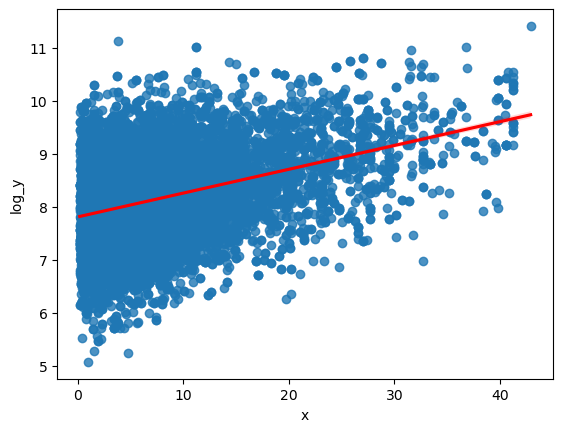

In [61]:
temprego_log = renda_temprego.copy()
temprego_log['log_y'] = np.log(temprego_log['y'])
_ = sns.regplot(x='x',y='log_y',data=temprego_log,line_kws={'color':'red'})
temprego_log.corr()

In [64]:
idade_rank = pd.concat([renda_idade,renda_idade.rank()],axis=1)
idade_rank.columns = ['x','y','x_rank','y_rank']
idade_rank

,x,y,x_rank,y_rank
0,36,3369.24,4421.5,7702.5
1,42,6096.14,7095.0,11716.5
2,31,5658.98,2291.5,11265.0
3,50,7246.69,10196.5,12603.0
4,52,4017.37,10956.0,9033.5
...,...,...,...,...
14995,37,1193.29,4863.5,1451.5
14996,30,2519.18,1874.5,5514.5
14997,40,1586.85,6209.0,2577.5
14998,47,6975.39,9097.0,12427.5


,x,y,x_rank,y_rank
x,1.000000,0.042570,0.996999,0.018163
y,0.042570,1.000000,0.048215,0.754549
x_rank,0.996999,0.048215,1.000000,0.024496
y_rank,0.018163,0.754549,0.024496,1.000000


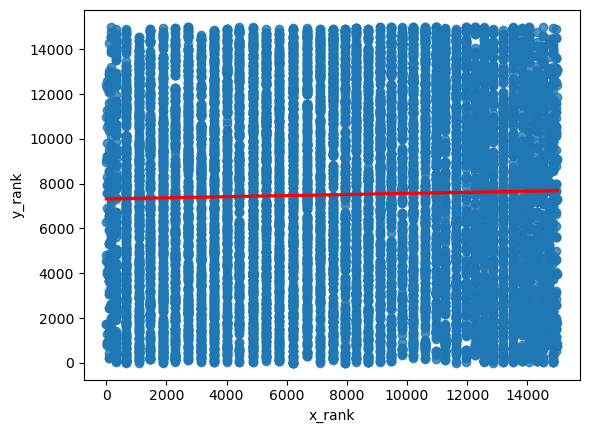

In [70]:
_ = sns.regplot(x='x_rank',y='y_rank',data=idade_rank,line_kws={'color':'red'})
idade_rank.corr()

,x,y,log_y
x,1.000000,0.042570,0.024712
y,0.042570,1.000000,0.835734
log_y,0.024712,0.835734,1.000000


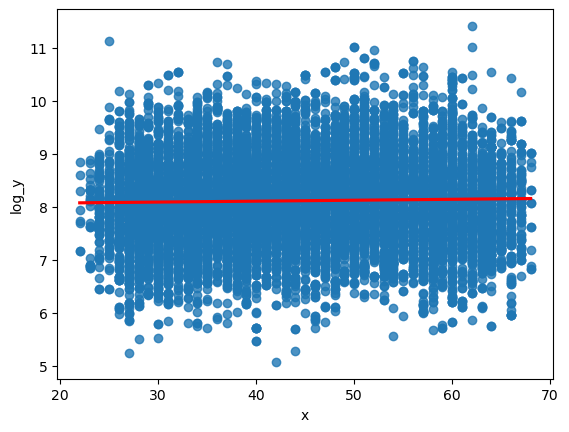

In [72]:
idade_log = renda_idade.copy()
idade_log['log_y'] = np.log(idade_log['y'])
_ = sns.regplot(x='x',y='log_y',data=idade_log,line_kws={'color':'red'})
idade_log.corr()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Para nenhum dos casos o LOG melhorou a analise, visto que foram observados muitos outliers e o coeficiente de correlacao em ambos os casos piorou.